<a href="https://colab.research.google.com/github/jonahcoutinho/Machine-Learning/blob/main/Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression

GAMMA AND REGULARISATION
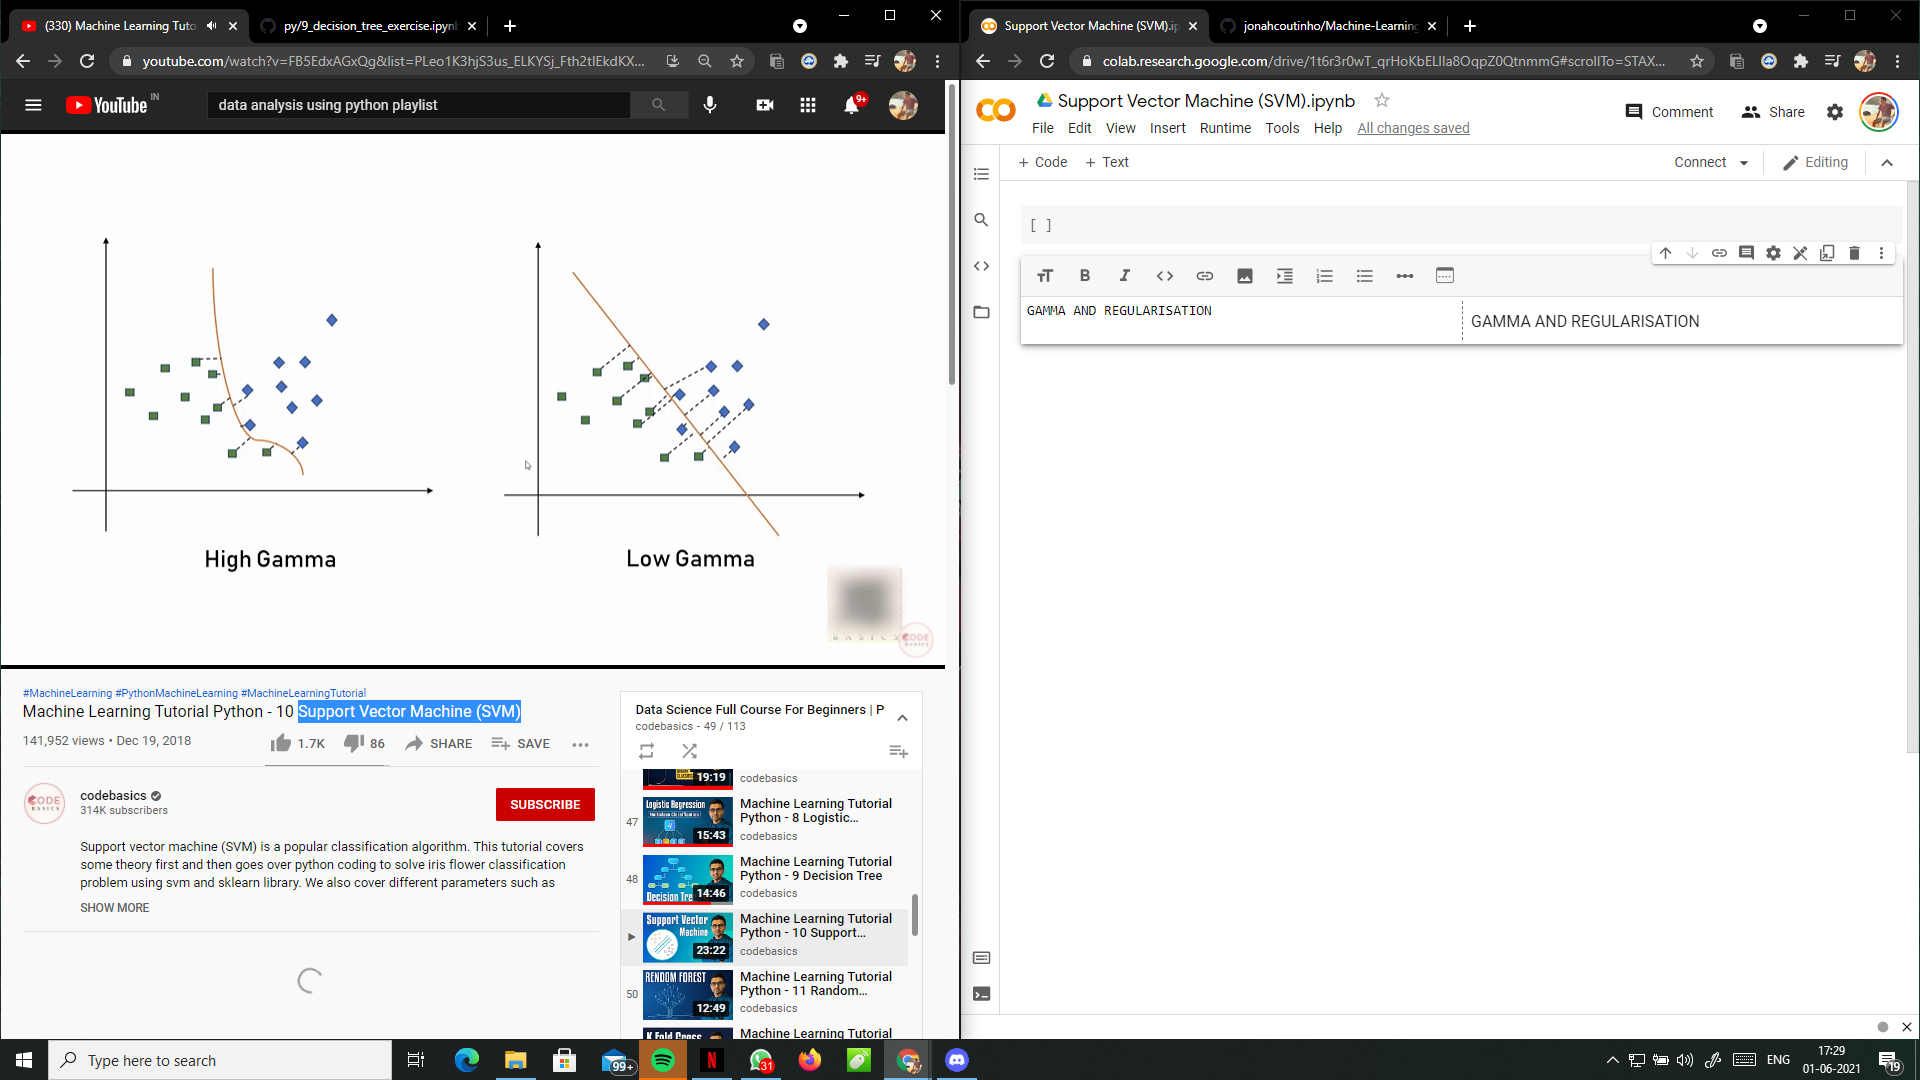

In [3]:
from sklearn.datasets import load_iris

In [6]:
iris=load_iris()

In [7]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [11]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df['target']=iris.target

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
  #we can append flower names to the colum using lambda

In [17]:
df['flower_names']=df.target.apply(lambda x: iris.target_names[x])

In [18]:
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [21]:
#lets visualise the plots
#first we divite it into 3 separate datasets
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

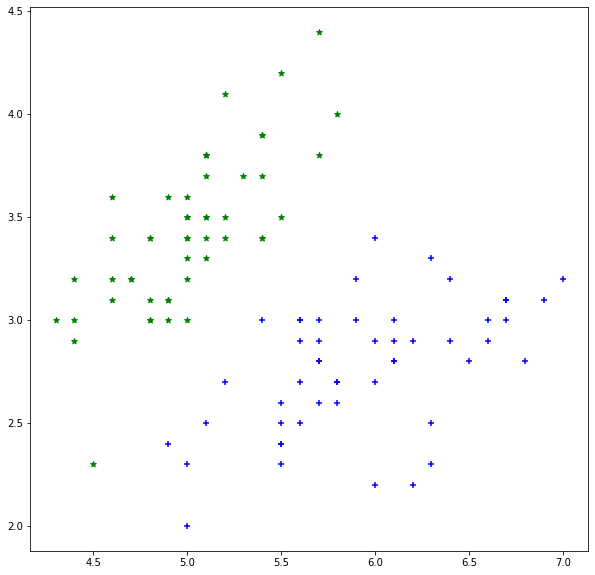

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='g',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='b',marker='+')
#plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='r')
plt.show()

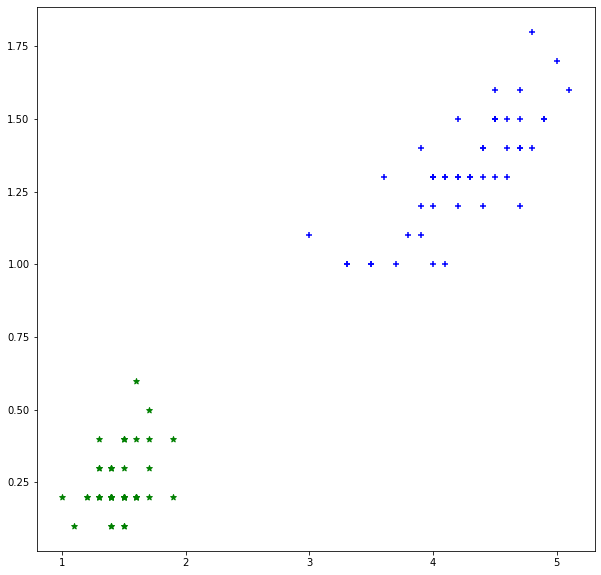

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='g',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='b',marker='+')
#plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='r')
plt.show()

In [33]:
X=df.drop(['target','flower_names'],axis='columns')
y=df.target

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [47]:
xtrain.shape

(105, 4)

In [48]:
xtest.shape

(45, 4)

Let use grid search for hyper parameter finding/tuning

In [60]:
from sklearn.model_selection import GridSearchCV
model=SVC()
param={'kernel':['linear','rbf','poly'],
       'C':[0.1,1,10,100], 'gamma': [0.001, 0.0001]} 
grid=GridSearchCV(model,param,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [61]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='linear',gamma=0.001)

In [62]:
model.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
model.score(xtest,ytest)

1.0

In [64]:
pred=model.predict(xtest)

In [65]:
confusion_matrix(pred,ytest)

array([[12,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 14]])